<a href="https://colab.research.google.com/github/41915074/python/blob/main/4%EC%9D%BC_%EB%8B%A8%EC%9C%84_%EC%98%A8%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus

In [39]:
url = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList'
service_key='s9d24DID8McX9iHiTGEso0ztWsa4PWO7VTdsHYHrWLcLZWsVU8SWuuPHlsbg8/b0Zc80XqjGWuiP1Y+xKsxCzw=='
queryParams = '?' + urlencode({quote_plus('ServiceKey') :'s9d24DID8McX9iHiTGEso0ztWsa4PWO7VTdsHYHrWLcLZWsVU8SWuuPHlsbg8/b0Zc80XqjGWuiP1Y+xKsxCzw==',
                               quote_plus('pageNo') : '1',
                               quote_plus('numOfRows') : '720',
                               quote_plus('dataType') : 'JSON',
                               quote_plus('dataCd') : 'ASOS', 
                               quote_plus('dateCd') : 'HR', 
                               quote_plus('startDt') : '20210101',
                               quote_plus('startHh') : '01',
                               quote_plus('endDt') : '20210131',
                               quote_plus('endHh') : '01',
                               quote_plus('stnIds') : '108' })

In [40]:
response = urlopen(url + queryParams)
json_api = response.read().decode("utf-8")


In [41]:
import pandas as pd
from pandas.io.json import json_normalize
import json

In [42]:
json_file = json.loads(json_api)

In [43]:
df=json_normalize(json_file['response']['body']['items']['item'])
df

<ipython-input-43-08b7aed4780f>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df=json_normalize(json_file['response']['body']['items']['item'])


,tm,rnum,stnId,stnNm,ta,taQcflg,rn,rnQcflg,ws,wsQcflg,...,lcsCh,vs,gndSttCd,dmstMtphNo,ts,tsQcflg,m005Te,m01Te,m02Te,m03Te
0,2021-01-01 01:00,1,108,서울,-8.7,,,,2.4,,...,,2000,,,-6.9,,-1.0,-0.8,0.3,1.6
1,2021-01-01 02:00,2,108,서울,-9.1,,,,1.6,,...,,2000,,,-7.1,,-1.1,-0.8,0.3,1.6
2,2021-01-01 03:00,3,108,서울,-9.3,,,,1.1,,...,,2000,,,-7.3,,-1.2,-0.9,0.3,1.6
3,2021-01-01 04:00,4,108,서울,-9.3,,,,0.3,,...,,2000,,,-7.5,,-1.3,-1.0,0.2,1.5
4,2021-01-01 05:00,5,108,서울,-9.7,,,,1.9,,...,,2000,,,-7.6,,-1.3,-1.0,0.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2021-01-30 20:00,716,108,서울,0.8,,,9,0.5,,...,,2000,,,-0.3,,0.4,-0.2,-0.3,0.4
716,2021-01-30 21:00,717,108,서울,0.1,,,9,1.6,,...,,1998,,,-0.4,,0.4,-0.2,-0.3,0.4
717,2021-01-30 22:00,718,108,서울,-0.7,,,9,0.9,,...,,1855,,,-0.6,,0.4,-0.2,-0.3,0.5
718,2021-01-30 23:00,719,108,서울,-1.3,,,9,1.3,,...,,1541,,,-0.7,,0.4,-0.2,-0.3,0.5


In [44]:
df.to_excel(excel_writer="weather.xlsx")

Text(0.5, 1.0, 'OPEN API ASOS Temperature data')

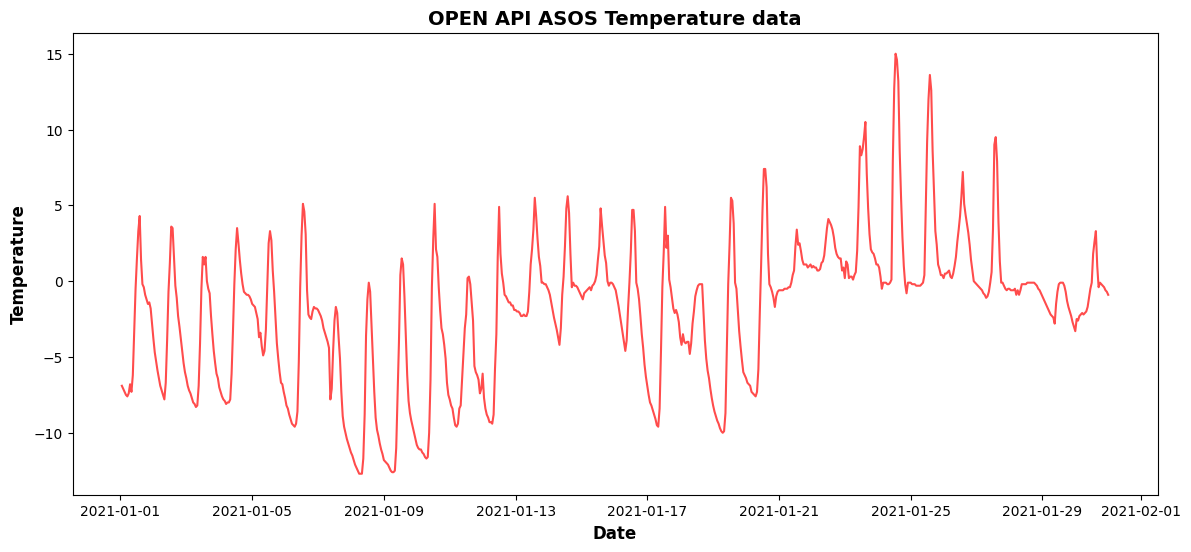

In [45]:
import matplotlib.pyplot as plt


df['tm']=pd.to_datetime(df['tm'])
df['ts'] = pd.to_numeric(df['ts'], downcast='float')

fig = plt.figure(figsize=(14,6))
ax = plt.subplot(1,1,1)

ax.plot(df['tm'],df['ts'],color='r',lw=1.5,alpha=0.7)
ax.set_ylabel('Temperature', fontweight='bold', fontsize=12)
ax.set_xlabel('Date', fontweight='bold', fontsize=12)
ax.set_title('OPEN API ASOS Temperature data', fontweight = 'bold',fontsize = 14)